# **Northwind Traders Data Analysis**
*Created by : Alfian*

<a id="toc"></a>

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">FOR BETTER EXPERIENCE IN JUPYTER</h1>

In [1]:
PATH = "Image\\"

In [1]:
# larger cell code only in jupyter notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

***Notes***
* I think my ToC only works in JupyterNotebook, but it's possible that it works in other environment too.
* Hyperlink that I made might not work well with several nbextension like `table of content`
* Others might also causing the issue, but I think uncheck only `table of content` will resolve the issue

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">TABLE OF CONTENT</h1>

<a id="toc"></a>

[1. PURPOSE & INTRODUCTION](#1)<br>

[2. GENERAL DATA INFORMATION](#2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. CONTEXT](#201)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. DATABASE INFORMATION](#202)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3. TABLE RELATIONSHIP](#203)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4. LIBRARY](#204)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4.1. PACKAGE](#20401)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4.2. DEFINED FUNCTION](#20402)<br>

[3. SQL](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. CONNECTING TO DATABASE](#301)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. TABLE INTEPRETATION](#302)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3. TABLE CREATION](#303)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.4. CTE & WINDOW FUNCTION](#304)<br>

[4. DATA EXPLORATION & DATA CLEANING](#4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1. GENERAL INFORMATION](#401)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.2. DATA CLEANING](#402)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.3. EXPLORE EACH COLUMN](#403)<br>

[5. DATA VISUALIZATION & STATISTICS](#5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.1. PRODUCT, CUSTOMER, SUPPLIER, SALES OVERTIME](#501)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.2. SHIPMENT ANALYSIS](#502)<br>

<a id="1"></a>
<font color="lightseagreen" size=+3><b>1. PURPOSE & INTRODUCTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* The objective of this notebook is to show what I've learn about data analysis. 
* I try to explain every process in the notebook so you guys who read it can understand as well. 
* I hope this notebook can be useful, Thanks for reading. 

If you like the notebook and think that it helped, you can consider upvoting this notebook. 

Thank you

<a id="2"></a>
<font color="lightseagreen" size=+3><b>2. GENERAL DATA INFORMATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="201"></a>
<font color="lightseagreen" size=+2.5><b>2.1. CONTEXT</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* This database explain about fictious company named `Northwind Traders`. 
* This company working on export & import `Speciality food` from all across the world. 
* Company want to know overview of the business they are running. 
* Is there anything we can find from the data that can help the company to run their business better ? 
* Is there any insight can be generated from the data to help the company to make a strategic move? 

<a id="202"></a>
<font color="lightseagreen" size=+2.5><b>2.2. DATABASE INFORMATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

This database contain 13 tables : 
- orders : contains transaction details such as order id, delivery date, delivery location, etc
- employees : contains employee information such as id, name, position, date of birth, residential address, etc
- employeesterritories : contains employee id information and regional id
- territories : contains area id information, and a description of the area
- region : contains the region id and region description
- orderdetails : contains order details such as order id, product id, unit price, quantity, discount
- products : contains product information such as product at, supplier id, category, unit, unit price, amount of stock, number of units in the order, etc.
- categories : contains category information such as, categoryid, categoryname, description, and illustrations
- suppliers : contains supplier information such as supplier company name, PIC, PIC position, supplier company address details, telephone number, etc.
- customers : contains customer information such as the name of the ordering company, PIC, PIC position, details of the ordering company address, telephone number and so on
- customercustomerdemo & customerdemographics : (empty tables for now)
- shippers : provide information on the delivery service used, such as, shipperid, company name and phone number.

<a id="203"></a>
<font color="lightseagreen" size=+2.5><b>2.3. ENTITY RELATIONSHIP DIAGRAM</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Entity Relationship Diagram (ERD) given as follow

In [3]:
from IPython.display import HTML
html1 = '<img src="Image\\Northwind ERD2.png" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

<a id="204"></a>
<font color="lightseagreen" size=+2.5><b>2.4. LIBRARY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="20401"></a>
<font color="lightseagreen" size=+2.5><b>2.4.1. PACKAGE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [4]:
# to connect SQL with python
import mysql.connector

# general library for data manipulation & data in general
import numpy as np
import pandas as pd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from IPython.display import HTML
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# for statistic 
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

# show all columns on pandas dataframe
pd.set_option("display.max_columns", None)

# show all value in columns, wider columns
pd.set_option("max_colwidth", 100)
  
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id="20402"></a>
<font color="lightseagreen" size=+2.5><b>2.4.2. DEFINED FUNCTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [5]:
# get variable name
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [6]:
# get variable name
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

# usage example
# namestr(df_orders, globals())
# keep the globals

# needed library
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# displaying column side by side
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# silahkan fungsi ini di trial. sepertinya masih butuh beberapa penyesuaian
def general_eda(df):
    gen_info = []
    for i in df.columns:
        try : 
            samples = df[i].drop_duplicates(keep = "first").sample(2).values
        except ValueError : 
            samples = df[i].sample().values

        try : 
            calc_std = round(np.std(df[i]), 4)
            calc_var = round(calc_std ** 2,4)
        except TypeError :
            calc_std = "-"
            calc_var = "-"      

        gen_info.append([
            i,
            df[i].dtype,
            calc_std, 
            calc_var,
            df[i].isna().sum(),
            round(((df[i].isna().sum()*100) / df.shape[0]),2), # cek bagian ini untuk lebih tepatnya.
            df[i].nunique(),
            samples])

    gen_info_df = pd.DataFrame(
                    data = gen_info,
                    columns = ["features", "type", "std", "variance", "n_null", "nullpct", "n_unique", "sampledata"])

    general_eda_check_duplicate = pd.DataFrame(df.duplicated().value_counts()).T

    general_eda_check_duplicate.rename(columns = {False : "not_duplicated", True : "duplicated"}, inplace = True)
    display_side_by_side(gen_info_df,general_eda_check_duplicate, titles = [f"General Information for {namestr(df, globals())[0]}", f"Check for Duplicated data {namestr(df, globals())[0]}"])

In [7]:
def col_info_by_index(df, i, figsize = (5, 3)):
    '''
    Giving column index, column name, unique item in that column, value counts and countplot
    
    Input : 
        - df      : the dataframe
        - i       : index column you want to check
        - figsize : by default is set (5, 3), can be adjusted 
        
    '''
    print(f"column index : {i}")
    print(f"column name : {df.columns[i]}")
    print("\nUnique item")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df[df.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = df[df.columns[i]], palette = "Set2")
    plt.xticks(rotation = 45, ha = "right")
    plt.show()
    
    return df_col_info

In [8]:
def visualize_distribution(df, features) :
    '''
    Understanding column that has numerical value. This function will give statistic descriptive, boxplot, histogram and skew value
    
    Input : 
    - df      : the dataframe
    - feature : feature names         
    
    '''
    print(f"Stats for {features}:")
    display(df[features].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10,8), 
                                   gridspec_kw = {"height_ratios": (.15, .85), "hspace": 0.05})
    
    ax1.set_title(f"Distribution of {features}", size = 15)
    sns.boxplot(data = df, x = features, ax = ax1)
    ax1.set(xlabel = "")
    ax1.grid()
    
    sns.histplot(data = df, x = features, kde = True, ax = ax2)
    ax2.grid()
    ax2.set_xlabel(f"{features}", size = 12)
    ax2.tick_params(axis = "both", labelsize = 10)
    
    plt.show()

    print(f"Skewness of {features}:", skew(df[features]))

<a id="3"></a>
<font color="lightseagreen" size=+3><b>3. SQL</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

What I will do in this section are as follows :
- Connecting Python to SQL
- Using CTE or windows function (if needed)
- Creating table for the case that I will discuss further

<a id="301"></a>
<font color="lightseagreen" size=+2.5><b>3.1. CONNECTING TO DATABASE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Below given code to connect python to SQL

In [9]:
# create connection
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    passwd = "password",
    database = "northwind")

# create access to database
mycursor = mydb.cursor()

# Create Function
def sql_df(yourQuery):
    mycursor.execute(yourQuery)
    myResult = mycursor.fetchall()
    df = pd.DataFrame(myResult, columns = mycursor.column_names)
    return df

Try using defined function to get data from database

In [10]:
# trial output
sql_df('''
SHOW TABLES;
''')

,Tables_in_northwind
0,categories
1,customercustomerdemo
2,customerdemographics
3,customers
4,employees
5,employeeterritories
6,orderdetails
7,orders
8,products
9,region


we can see dataframe in output above, this mean we can continue to the next step

<a id="302"></a>
<font color="lightseagreen" size=+2.5><b>3.2. TABLE INTEPRETATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* The focus of my analysis is `orders`, therefore I need all table that will complement `orders table`. 
* To find out what table is needed, look at the [**ERD**](#203) given above and all tables that Northwind Traders has below
* In this section I try to understand the data, then determine which column will be used for our analysis
* Just in case we need those tables individually, we assign them to variables

### ORDERS TABLE

In [11]:
df_orders = sql_df('''
SELECT * FROM orders
''')

df_orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.3800,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.6100,Toms Spezialitten,Luisenstr. 48,Mnster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.8300,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.3400,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3000,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,NaT,2,24.9500,Pericles Comidas clsicas,Calle Dr. Jorge Cash 321,Mxico D.F.,None,5033,Mexico
826,11074,SIMOB,7,1998-05-06,1998-06-03,NaT,2,18.4400,Simons bistro,Vinbltet 34,Kobenhavn,None,1734,Denmark
827,11075,RICSU,8,1998-05-06,1998-06-03,NaT,2,6.1900,Richter Supermarkt,Starenweg 5,Genve,None,1204,Switzerland
828,11076,BONAP,4,1998-05-06,1998-06-03,NaT,2,38.2800,Bon app-,"12, rue des Bouchers",Marseille,None,13008,France


### ORDER DETAILS TABLE

In [12]:
df_order_details = sql_df('''
SELECT * FROM orderdetails;
''')

df_order_details

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0000,12,0.0
1,10248,42,9.8000,10,0.0
2,10248,72,34.8000,5,0.0
3,10249,14,18.6000,9,0.0
4,10249,51,42.4000,40,0.0
...,...,...,...,...,...
2150,11077,64,33.2500,2,0.0
2151,11077,66,17.0000,1,0.0
2152,11077,73,15.0000,2,0.0
2153,11077,75,7.7500,4,0.0


### PRODUCTS

In [13]:
df_products = sql_df('''
SELECT * FROM products;
''')

df_products

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0000,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0000,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0000,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.3500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Rd Kaviar,17,8,24 - 150 g jars,15.0000,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.0000,4,20,5,0
74,75,Rhnbru Klosterbier,12,1,24 - 0.5 l bottles,7.7500,125,0,25,0
75,76,Lakkalikri,23,1,500 ml,18.0000,57,0,20,0


### CATEGORIES

In [14]:
df_categories = sql_df('''
SELECT * FROM categories
''')

df_categories

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000500000FFEE002641646F62...
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings",b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B79000100040000004C0000FFEE002641646F62...
2,3,Confections,"Desserts, candies, and sweet breads",b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000410000FFEE002641646F62...
3,4,Dairy Products,Cheeses,b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000500000FFEE002641646F62...
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B79000100040000004C0000FFEE002641646F62...
5,6,Meat/Poultry,Prepared meats,b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000410000FFEE002641646F62...
6,7,Produce,Dried fruit and bean curd,b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B7900010004000000460000FFEE002641646F62...
7,8,Seafood,Seaweed and fish,b'FFD8FFE000104A46494600010200006400640000FFEC00114475636B79000100040000004B0000FFEE002641646F62...


### CUSTOMERS

In [15]:
df_customers = sql_df('''
SELECT * FROM customers;
''')

df_customers

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitucin 2222,Mxico D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquera,Antonio Moreno,Owner,Mataderos 2312,Mxico D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Berguvsvgen 8,Lule,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
88,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,None,90110,Finland,981-443655,981-443655
89,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,None
90,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
91,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,None,21240,Finland,90-224 8858,90-224 8858


### SUPPLIERS

In [16]:
df_suppliers = sql_df('''
SELECT * FROM suppliers
LIMIT 10
''')

df_suppliers

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai\r\nMusashino-shi,Tokyo,None,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko\r\nChuo-ku,Osaka,None,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/mayumi.htm#
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St.\r\nMoonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,None,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Knckebrd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Gteborg,None,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,So Paulo,None,5442,Brazil,(11) 555 4640,None,None


<a id="303"></a>
<font color="lightseagreen" size=+2.5><b>3.3. TABLE CREATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* After reviewing the table above, the information needed from each table to discuss the focus of the "orders" analysis is as follows:
    - orders : OrderID, OrderDate, RequiredDate, ShippedDate, ShipCity, ShipRegion, ShipCountry
    - order detail : OrderID, ProductID, UnitPrice, Quantity, Discount
    - products : ProductID, ProductName, CategoryID, UnitPrice, UnitsInStock, UnitsOnOrder, ReorderLevel, Discontinued
    - categories : CategoryID, CategoryName, Description
    - customer : companyname
    - shippers : companyname
    - suppliers : companyname

* I will not display all of the column data above. there are several column that will be used to link information between tables (primary key)
* I also arranged the columns from the table in such a way to make it easier for me to review the information. 
* I will explain the arrangement of the columns with the image below. these colors inform the source table of that column.

In [17]:
html1 = '<img src="Image\\df_.jpg" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

In [18]:
df = sql_df('''
SELECT  o.orderid, cust.companyname AS cust_companyname,
        p.productname,
        cat.categoryname, cat.description,
        o.orderdate, o.requireddate, o.shippeddate, o.shipcity, o.shipregion, o.shipcountry, o.freight,
        odtl.unitprice, odtl.quantity, odtl.discount,
        p.unitsinstock, p.unitsonorder, p.reorderlevel, p.discontinued,
        shp.CompanyName AS ExpeditionService,
        sup.CompanyName AS supplier_companyname, sup.Country AS supplier_country
FROM orders o
LEFT JOIN orderdetails odtl
USING (orderid)
LEFT JOIN products p
USING (productid)
LEFT JOIN categories cat
USING (categoryid)
LEFT JOIN customers cust
USING(CustomerID)
LEFT JOIN shippers shp
ON o.ShipVia = shp.ShipperID
LEFT JOIN suppliers sup
USING (SupplierID);
''')

df.head(5)

,orderid,cust_companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipregion,shipcountry,freight,unitprice,quantity,discount,unitsinstock,unitsonorder,reorderlevel,discontinued,ExpeditionService,supplier_companyname,supplier_country
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,14.0000,12,0.0,22,30,30,0,Federal Shipping,Cooperativa de Quesos 'Las Cabras',Spain
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,9.8000,10,0.0,26,0,0,1,Federal Shipping,Leka Trading,Singapore
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,34.8000,5,0.0,14,0,0,0,Federal Shipping,Formaggi Fortini s.r.l.,Italy
3,10249,Toms Spezialitten,Tofu,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,18.6000,9,0.0,35,0,0,0,Speedy Express,Mayumi's,Japan
4,10249,Toms Spezialitten,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,42.4000,40,0.0,20,0,10,0,Speedy Express,"G'day, Mate",Australia


<a id="304"></a>
<font color="lightseagreen" size=+2.5><b>3.4. CTE & WINDOW FUNCTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* I feel that there is a price difference between the unit price from the product table and the unit price from the order details table. 
* To check , I created a new query to check the prices of the two tables. 
* For the table and column plans to be used, see the illustration below.
* If you notice I will implement the CTE function and some window functions like OVER(PARTITION BY) and ROW_NUMBER(PARTITION BY). 
* I use the window function so that none of my row data is lost and I can compare values based on product name or category (I can't fulfill this if I use the aggregate function.)

In [19]:
html1 = '<img src="Image\\CTE&WindowFunction.jpg" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

In [20]:
sql_df('''
WITH step_1 AS(
SELECT  o.orderid,
        o.requireddate,
        p.productname,
        cat.categoryname,
        odtl.unitprice AS odtl_unitprice,
        p.unitprice AS prodcat_unitprice
FROM orders o
LEFT JOIN orderdetails odtl
USING (orderid)
LEFT JOIN products p
USING (productid)
LEFT JOIN categories cat
USING (categoryid)
),
step_2 AS(
SELECT  orderid,
        requireddate,
        productname,
        categoryname,
        ROW_NUMBER() OVER(PARTITION BY categoryname) AS row_number_cat,                          -- the extra
        ROUND(odtl_unitprice,3) AS odtl_unitprice,
        ROUND(MIN(odtl_unitprice) OVER(PARTITION BY productname),3) AS min_odtl_unit_price,      -- the extra
        ROUND(MAX(odtl_unitprice) OVER(PARTITION BY productname),3) AS max_odtl_unit_price,      -- the extra
        ROUND(AVG(odtl_unitprice) OVER(PARTITION BY productname),3) AS avg_odtl_unit_price,      -- the extra
        ROUND(prodcat_unitprice,3) AS prodcat_unitprice
FROM step_1
)
SELECT  orderid,
        requireddate,
        productname,
        categoryname,
        row_number_cat,                         
        odtl_unitprice,
        max_odtl_unit_price,     
        min_odtl_unit_price,
        avg_odtl_unit_price,
        prodcat_unitprice
FROM step_2
WHERE productname = "Thringer Rostbratwurst"
LIMIT 20;
''')

,orderid,requireddate,productname,categoryname,row_number_cat,odtl_unitprice,max_odtl_unit_price,min_odtl_unit_price,avg_odtl_unit_price,prodcat_unitprice
0,10268,1996-08-27,Thringer Rostbratwurst,Meat/Poultry,4,99.000,123.790,99.000,116.043,123.790
1,10290,1996-09-24,Thringer Rostbratwurst,Meat/Poultry,9,99.000,123.790,99.000,116.043,123.790
2,10305,1996-10-11,Thringer Rostbratwurst,Meat/Poultry,12,99.000,123.790,99.000,116.043,123.790
3,10354,1996-12-12,Thringer Rostbratwurst,Meat/Poultry,24,99.000,123.790,99.000,116.043,123.790
4,10360,1996-12-20,Thringer Rostbratwurst,Meat/Poultry,26,99.000,123.790,99.000,116.043,123.790
5,10369,1996-12-30,Thringer Rostbratwurst,Meat/Poultry,30,99.000,123.790,99.000,116.043,123.790
6,10382,1997-01-10,Thringer Rostbratwurst,Meat/Poultry,33,99.000,123.790,99.000,116.043,123.790
7,10400,1997-01-29,Thringer Rostbratwurst,Meat/Poultry,38,99.000,123.790,99.000,116.043,123.790
8,10440,1997-03-10,Thringer Rostbratwurst,Meat/Poultry,49,99.000,123.790,99.000,116.043,123.790
9,10465,1997-04-02,Thringer Rostbratwurst,Meat/Poultry,57,99.000,123.790,99.000,116.043,123.790


* From the table above, turns out my guess was quite right. if you look at the "unitprice" of order details (`odtl_unitprice`), there was an increase in price from 99 to 123,790 in 1977-04-02 to 1977-05-16.
* This price difference may occur because the product table is a product catalog that is regularly updated, which different from orderdetails which is a table to store historical overall sales data from time to time.
* the product "Thringer Rostbratwurst" has the same price every month from 1996-08-27 to 1997-04-02 of 99. Then the price increase in 1977-05-16 to 123,790. This may happen because there's renewal in the contract (or simply the contract already expired and need to be renewed. the price need to be adjusted certain price need to be adjusted)
* Based on this information we can explore price change from time to time for each product later

<a id="4"></a>
<font color="lightseagreen" size=+3><b>4. DATA EXPLORATION & DATA CLEANING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* Any anomalies in the data ? Anomalies consist of : 
    * missing values
    * duplicate data
    * wrong formatting
    * inconsistency typing
* If there's any, how do you handle the anomalies ? 

Below we call the dataframe that we made earlier in [**this section**](#303)

<a id="401"></a>
<font color="lightseagreen" size=+2.5><b>4.1. GENERAL INFORMATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Before we continuing any further, I make the copy of the data. Just in case if something happen, I can go back back to the original

In [21]:
df1 = df.copy()
df1.head()

,orderid,cust_companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipregion,shipcountry,freight,unitprice,quantity,discount,unitsinstock,unitsonorder,reorderlevel,discontinued,ExpeditionService,supplier_companyname,supplier_country
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,14.0000,12,0.0,22,30,30,0,Federal Shipping,Cooperativa de Quesos 'Las Cabras',Spain
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,9.8000,10,0.0,26,0,0,1,Federal Shipping,Leka Trading,Singapore
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,34.8000,5,0.0,14,0,0,0,Federal Shipping,Formaggi Fortini s.r.l.,Italy
3,10249,Toms Spezialitten,Tofu,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,18.6000,9,0.0,35,0,0,0,Speedy Express,Mayumi's,Japan
4,10249,Toms Spezialitten,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,42.4000,40,0.0,20,0,10,0,Speedy Express,"G'day, Mate",Australia


First I want to see data type and numbers of data that we have in our table

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   orderid               2155 non-null   int64         
 1   cust_companyname      2155 non-null   object        
 2   productname           2155 non-null   object        
 3   categoryname          2155 non-null   object        
 4   description           2155 non-null   object        
 5   orderdate             2155 non-null   datetime64[ns]
 6   requireddate          2155 non-null   datetime64[ns]
 7   shippeddate           2082 non-null   datetime64[ns]
 8   shipcity              2155 non-null   object        
 9   shipregion            856 non-null    object        
 10  shipcountry           2155 non-null   object        
 11  freight               2155 non-null   object        
 12  unitprice             2155 non-null   object        
 13  quantity          

More detailed information by using defined function

In [23]:
general_eda(df1)

,features,type,std,variance,n_null,nullpct,n_unique,sampledata
0,orderid,int64,241.322,58236.3077,0,0.00,830,"[10546, 10500]"
1,cust_companyname,object,-,-,0,0.00,89,"[Reggiani Caseifici, Bottom-Dollar Markets]"
2,productname,object,-,-,0,0.00,77,"[Gravad lax, Longlife Tofu]"
3,categoryname,object,-,-,0,0.00,8,"[Beverages, Meat/Poultry]"
4,description,object,-,-,0,0.00,8,"[Cheeses, Desserts, candies, and sweet breads]"
5,orderdate,datetime64[ns],-,-,0,0.00,480,"[1997-07-14T00:00:00.000000000, 1997-03-25T00:00:00.000000000]"
6,requireddate,datetime64[ns],-,-,0,0.00,454,"[1998-01-06T00:00:00.000000000, 1997-05-30T00:00:00.000000000]"
7,shippeddate,datetime64[ns],-,-,73,3.39,387,"[1997-09-11T00:00:00.000000000, 1997-12-31T00:00:00.000000000]"
8,shipcity,object,-,-,0,0.00,70,"[Kln, Reggio Emilia]"
9,shipregion,object,-,-,1299,60.28,19,"[Lara, Co. Cork]"


See our numerical data distribution

In [24]:
df1.describe()

,orderid,quantity,discount,unitsinstock,unitsonorder,reorderlevel,discontinued
count,2155.000000,2155.000000,2155.0,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,23.812993,0.0,39.795824,8.074246,11.900232,0.105800
std,241.378032,19.022047,0.0,36.055668,19.748983,10.791421,0.307653
min,10248.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,10451.000000,10.000000,0.0,17.000000,0.000000,0.000000,0.000000
50%,10657.000000,20.000000,0.0,25.000000,0.000000,10.000000,0.000000
75%,10862.500000,30.000000,0.0,57.000000,0.000000,20.000000,0.000000
max,11077.000000,130.000000,0.0,125.000000,100.000000,30.000000,1.000000


<a id="402"></a>
<font color="lightseagreen" size=+2.5><b>4.2. DATA CLEANING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<font color="lightseagreen" size=+2.5><b>CHANGING DATA TYPE, MISISNG VALUES, ANOMALY</b></font>

* From the information given above. there are some things that I can observe in the form of anomalies.
* For data types that do not match data :
    - unitprice : object -> will be converted to numeric data type
    - freight : object -> will be converted to numeric data type
* Discount column only containing 1 value = 0 for 2155 rows of data. This column will be removed
* We've got no duplicate value

In [25]:
# Changing data type
df1["unitprice"] = pd.to_numeric(df1["unitprice"])
df1["freight"] = pd.to_numeric(df1["freight"])

# Drop discount column
df1.drop(columns = ["discount"], inplace = True)

* As we can see in the table above, unitprice & freight already have correct data type. 
* We can continue to handle missing values
* We have 2 columns that has missing values (shippeddate, shipregion), what I'll do to handle those columns are as follows : 
    - I will drop the `shipregion` feature because null percentage is high (60.28%). Even if I fill it with mode, the results will not be relevant so it's better to just drop it.
    - I will maintain the `shippeddate` feature because the null percentage is still low (3.39%). In this case, I drop all rows where the `shippeddate` has a missing value.

* From the information given above. there are some things that I can observe in the form of anomalies.
* For data types that do not match data :
    - unitprice : object -> will be converted to numeric data type
    - freight : object -> will be converted to numeric data type
* Discount column only containing 1 value = 0 for 2155 rows of data. This column will be removed

In [26]:
# Drop shipregion column
df1.drop("shipregion", axis = 1, inplace = True)

# Drop all rows of data where shippeddate is missing
df1.dropna(subset = ["shippeddate"], inplace = True)

I want to see the dataframe after I've made some changes

In [27]:
general_eda(df1)

,features,type,std,variance,n_null,nullpct,n_unique,sampledata
0,orderid,int64,233.0663,54319.9002,0,0.0,809,"[10673, 10981]"
1,cust_companyname,object,-,-,0,0.0,89,"[Ricardo Adocicados, Galera del gastrnomo]"
2,productname,object,-,-,0,0.0,77,"[Geitost, Queso Cabrales]"
3,categoryname,object,-,-,0,0.0,8,"[Produce, Dairy Products]"
4,description,object,-,-,0,0.0,8,"[Sweet and savory sauces, relishes, spreads, and seasonings, Breads, crackers, pasta, and cereal]"
5,orderdate,datetime64[ns],-,-,0,0.0,478,"[1997-10-29T00:00:00.000000000, 1997-06-26T00:00:00.000000000]"
6,requireddate,datetime64[ns],-,-,0,0.0,450,"[1997-06-19T00:00:00.000000000, 1998-02-17T00:00:00.000000000]"
7,shippeddate,datetime64[ns],-,-,0,0.0,387,"[1997-05-05T00:00:00.000000000, 1997-07-29T00:00:00.000000000]"
8,shipcity,object,-,-,0,0.0,70,"[Butte, Madrid]"
9,shipcountry,object,-,-,0,0.0,21,"[Mexico, France]"


In this secton I want to check how much data we retain after handling anomalies

In [28]:
print(f"Rows of data before handling missing values = {len(df)}")
print(f"Rows of data after handling missing values = {len(df1)}")
print(f"We retain {round((len(df1)/len(df))*100, 2)} % of the data")

Rows of data before handling missing values = 2155
Rows of data after handling missing values = 2082
We retain 96.61 % of the data


<a id="403"></a>
<font color="lightseagreen" size=+2.5><b>4.3. EXPLORE EACH COLUMN</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* In this section, I try to understand what information contain in each column

**NOTES**: 
* You can try use the defined function I use to explore other columns
* So that the notebook is not too long, I only show several columns for instance and several columns that I process further

column index : 3
column name : categoryname

Unique item
['Dairy Products' 'Grains/Cereals' 'Produce' 'Seafood' 'Condiments'
 'Confections' 'Beverages' 'Meat/Poultry']

Value Counts


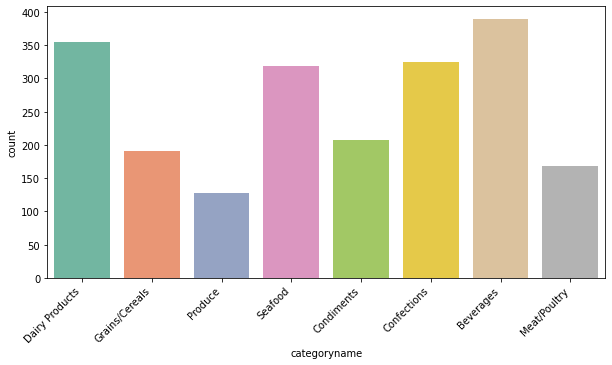

,n_categoryname
Beverages,389
Dairy Products,355
Confections,324
Seafood,319
Condiments,207
Grains/Cereals,191
Meat/Poultry,169
Produce,128


In [29]:
col_info_by_index(df1, 3, figsize = (10,5))

I see no anomaly happening in `categoryname` features, so we can continue to check other features

column index : 8
column name : shipcity

Unique item
['Reims' 'Mnster' 'Rio de Janeiro' 'Lyon' 'Charleroi' 'Bern' 'Genve'
 'Resende' 'San Cristbal' 'Graz' 'Mxico D.F.' 'Kln' 'Albuquerque' 'Brcke'
 'Strasbourg' 'Oulu' 'Mnchen' 'Caracas' 'Seattle' 'Lander' 'Cunewalde'
 'Bergamo' 'Leipzig' 'Lule' 'Frankfurt a.M.' 'Madrid' 'Barquisimeto'
 'Reggio Emilia' 'London' 'Sao Paulo' 'Cork' 'Stuttgart' 'Sevilla'
 'Anchorage' 'Portland' 'Nantes' 'Cowes' 'Brandenburg' 'Boise' 'Lisboa'
 'Marseille' 'Montral' 'Kobenhavn' 'Toulouse' 'Salzburg' 'Colchester'
 'Aachen' 'Barcelona' 'rhus' 'Warszawa' 'Elgin' 'Stavern' 'Tsawassen'
 'I. de Margarita' 'Lille' 'Buenos Aires' 'Torino' 'Campinas'
 'Walla Walla' 'Vancouver' 'Mannheim' 'Eugene' 'Bruxelles' 'Kirkland'
 'San Francisco' 'Helsinki' 'Butte' 'Berlin' 'Paris' 'Versailles']

Value Counts


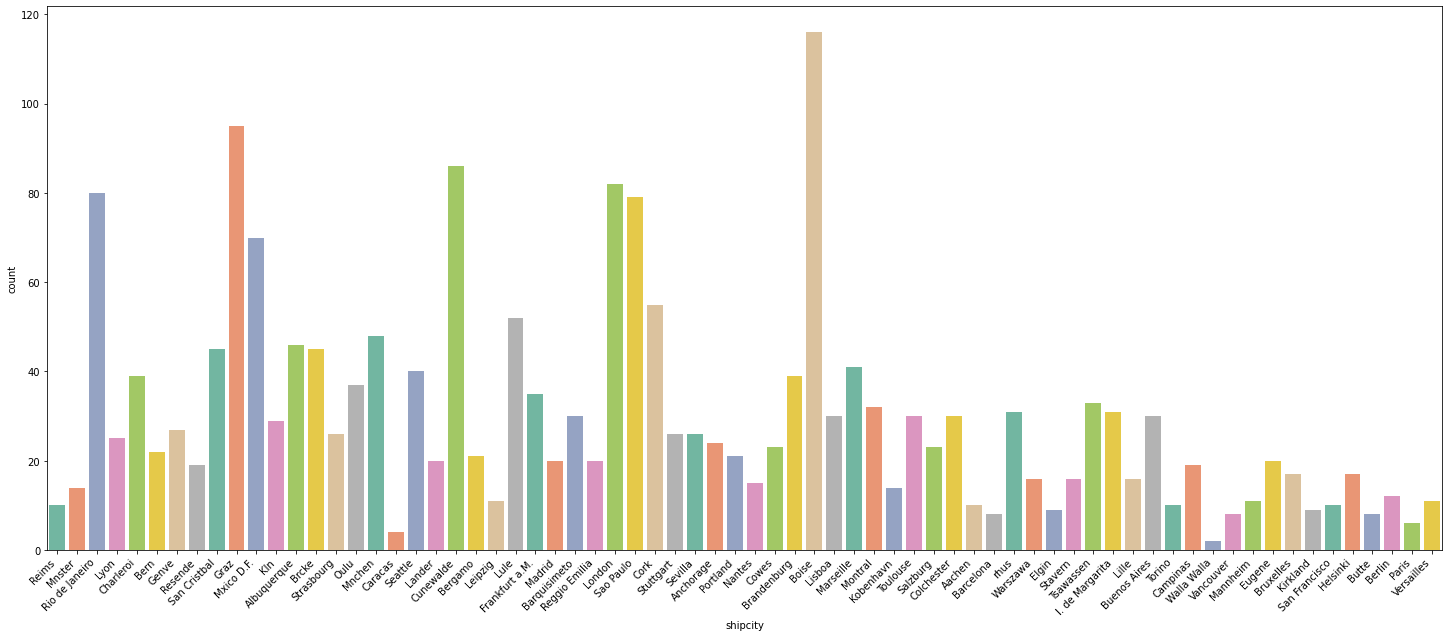

,n_shipcity
Boise,116
Graz,95
Cunewalde,86
London,82
Rio de Janeiro,80
...,...
Barcelona,8
Butte,8
Paris,6
Caracas,4


In [30]:
col_info_by_index(df1, 8, figsize = (25,10))

From the information about the shipcity feature above, I actually found a typo. An example of this typo is as follows:
- Munich, I assume is Munich
- Mnster, I assume is Manchester
- Mxico D.F., I assume Mexico D.F.

After I checked with the existing data.
- Munich, my assumption is right Munich
- Mnster, should be Munster (because it is a German state, not UK)
- Mxico D.F., my assumption is correct Mexico D.F.

actually the typo is not a big problem because the error is consistent. but because we know that it is a typo, let's change those to what it should be

In [31]:
df1["shipcity"].replace("Mnchen", "Munchen", inplace = True)
df1["shipcity"].replace("Mnster", "Munster", inplace = True)
df1["shipcity"].replace("Mxico D.F.", "Mexico D.F.", inplace = True)

Stats for unitprice:


count    2082.000000
mean       26.379500
std        30.224352
min         2.000000
25%        12.000000
50%        18.400000
75%        32.000000
max       263.500000
Name: unitprice, dtype: float64

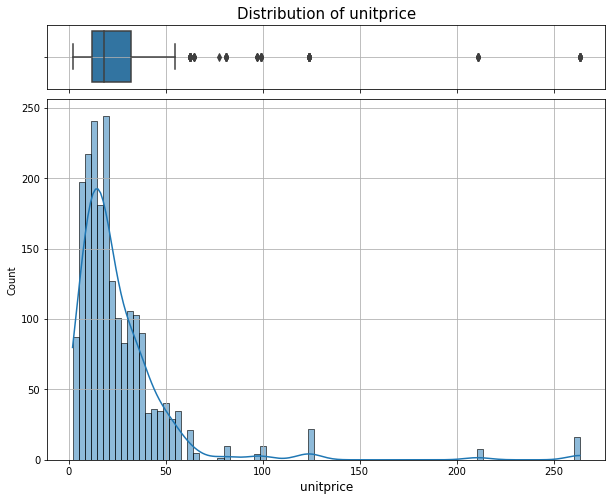

Skewness of unitprice: 5.055406591682567


In [32]:
visualize_distribution(df1, df1.columns[11])

* From the distplot graph and value skewness, the freight feature is not normally distributed (has a skewness value: 3.217 and a right skew / positive skew)
* From the output of the freight feature boxplot graph above, we find outliers, let's explore it further.

In [33]:
expensive_product = df1[df1["unitprice"] > 150]["productname"].unique()
expensive_product

array(['Cte de Blaye'], dtype=object)

In [34]:
df1[df1["productname"] == "Cte de Blaye"]

,orderid,cust_companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,unitsinstock,unitsonorder,reorderlevel,discontinued,ExpeditionService,supplier_companyname,supplier_country
218,10329,Split Rail Beer & Ale,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-10-15,1996-11-26,1996-10-23,Lander,USA,191.67,210.8,20,17,0,15,0,United Package,Aux joyeux ecclsiastiques,France
274,10351,Ernst Handel,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-11-11,1996-12-09,1996-11-20,Graz,Austria,162.33,210.8,20,17,0,15,0,Speedy Express,Aux joyeux ecclsiastiques,France
281,10353,Piccolo und mehr,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-11-13,1996-12-11,1996-11-25,Salzburg,Austria,360.63,210.8,50,17,0,15,0,Federal Shipping,Aux joyeux ecclsiastiques,France
300,10360,Blondesddsl pre et fils,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-11-22,1996-12-20,1996-12-02,Strasbourg,France,131.70,210.8,10,17,0,15,0,Federal Shipping,Aux joyeux ecclsiastiques,France
331,10372,Queen Cozinha,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-12-04,1997-01-01,1996-12-09,Sao Paulo,Brazil,890.78,210.8,40,17,0,15,0,United Package,Aux joyeux ecclsiastiques,France
449,10417,Simons bistro,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-01-16,1997-02-13,1997-01-28,Kobenhavn,Denmark,70.29,210.8,50,17,0,15,0,Federal Shipping,Aux joyeux ecclsiastiques,France
471,10424,Mre Paillarde,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-01-23,1997-02-20,1997-01-27,Montral,Canada,370.61,210.8,49,17,0,15,0,United Package,Aux joyeux ecclsiastiques,France
613,10479,Rattlesnake Canyon Grocery,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-03-19,1997-04-16,1997-03-21,Albuquerque,USA,708.95,210.8,30,17,0,15,0,Federal Shipping,Aux joyeux ecclsiastiques,France
713,10518,Tortuga Restaurante,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-04-25,1997-05-09,1997-05-05,Mexico D.F.,Mexico,218.15,263.5,15,17,0,15,0,United Package,Aux joyeux ecclsiastiques,France
782,10540,QUICK-Stop,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-05-19,1997-06-16,1997-06-13,Cunewalde,Germany,1007.64,263.5,30,17,0,15,0,Federal Shipping,Aux joyeux ecclsiastiques,France


* After we investigate, the productname with unit price > 150 is only Cte de Blaye and it's normal if certain small percentage product having an extreme high price. 
* The distribution can tell us that there's more affordable product rather than expensive product (right skew, median around 18.40)
* No action is taken to address these outliers. I will continue to the next feature.

column index : 16
column name : discontinued

Unique item
[0 1]

Value Counts


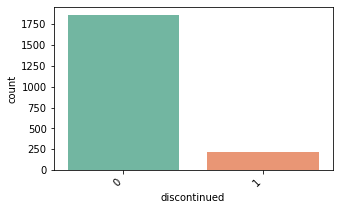

,n_discontinued
0,1861
1,221


In [35]:
col_info_by_index(df1, 16)

* feature : `discontinued`, informs us whether the product has been discontinued or is no longer produced. 
    * for 0 informs that the product has not been discontinued
    * for 1 product has been discontinued. 

* it's a good idea to change to categorical data "YES" for 1 and "NO" for 0 to make it easier to be understood

In [36]:
df1["discontinued"].replace(0, "No", inplace = True)
df1["discontinued"].replace(1, "Yes", inplace = True)

<a id="5"></a>
<font color="lightseagreen" size=+3><b>5. DATA VISUALIZATION & STATISTICS</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

First let's look at our data

In [37]:
df1.head()

,orderid,cust_companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,unitsinstock,unitsonorder,reorderlevel,discontinued,ExpeditionService,supplier_companyname,supplier_country
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,14.0,12,22,30,30,No,Federal Shipping,Cooperativa de Quesos 'Las Cabras',Spain
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,9.8,10,26,0,0,Yes,Federal Shipping,Leka Trading,Singapore
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,34.8,5,14,0,0,No,Federal Shipping,Formaggi Fortini s.r.l.,Italy
3,10249,Toms Spezialitten,Tofu,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,18.6,9,35,0,0,No,Speedy Express,Mayumi's,Japan
4,10249,Toms Spezialitten,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,42.4,40,20,0,10,No,Speedy Express,"G'day, Mate",Australia


Before continuing any further. I'll do quick calculation of several things :
* SalesAmount   : $[unitprice * quantity]$
* cp-day1       : $[requireddate - orderdate]$ (The days it takes from the customer ordering until the goods are received)
* cp-day2       : $[shippeddate - orderdate]$ (The days it takes for the seller to prepare the order and hand it over to the expedition for delivery to the customer)
* cp-day3       : $[requireddate - shippeddate]$ (The days it takes for the expedition to deliver it to customer)
* cp-daycontrol : $[cpday1 - cpday2 - cpday3]$

For precautions, let's make a copy of our `df1` and add the calculation to those copy instead. So we can go back if we needed.

In [38]:
# Create copy of the df1
df2 = df1.copy()

# Add calculation as stated above
df2["SalesAmount"] = df2["unitprice"] * df2["quantity"]
df2["cp_day1"] = (df2["requireddate"] - df2["orderdate"]).dt.days
df2["cp_day2"] = (df2["shippeddate"] - df2["orderdate"]).dt.days
df2["cp_day3"] = (df2["requireddate"] - df2["shippeddate"]).dt.days
df2["cp_daycontrol"] = (df2["cp_day1"] - df2["cp_day2"] - df2["cp_day3"])

Let's see new dataframe with added features

In [39]:
df2.head()

,orderid,cust_companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,unitsinstock,unitsonorder,reorderlevel,discontinued,ExpeditionService,supplier_companyname,supplier_country,SalesAmount,cp_day1,cp_day2,cp_day3,cp_daycontrol
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,14.0,12,22,30,30,No,Federal Shipping,Cooperativa de Quesos 'Las Cabras',Spain,168.0,28,12,16,0
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,9.8,10,26,0,0,Yes,Federal Shipping,Leka Trading,Singapore,98.0,28,12,16,0
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,34.8,5,14,0,0,No,Federal Shipping,Formaggi Fortini s.r.l.,Italy,174.0,28,12,16,0
3,10249,Toms Spezialitten,Tofu,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,18.6,9,35,0,0,No,Speedy Express,Mayumi's,Japan,167.4,42,5,37,0
4,10249,Toms Spezialitten,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,42.4,40,20,0,10,No,Speedy Express,"G'day, Mate",Australia,1696.0,42,5,37,0


We can see that we have many features. I'll make separate table to discuss certain section. It make things easier and I'll prefer it that way

<a id="501"></a>
<font color="lightseagreen" size=+2.5><b>5.1. PRODUCT, CUSTOMER, SUPPLIER, SALES OVERTIME</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

We can make visualization based on this question : 
1. What categories are the best selling products from NorthwindTraders ?
2. Proportion of purchases based on Country ? 
3. Top 10 Customer ?
4. Top 5 product from each categories ?
5. 5 product that sells the least ?
6. 10 Most Important Supplier
7. How's Business on Northwind Traders ?
8. Product price trend ?

To answer this question, I will create a new table containing only relevant features only

In [40]:
df2_topic1 = df2[["orderid", "orderdate", "productname", "categoryname", "unitprice", "quantity", "SalesAmount", "cust_companyname", "shipcountry", "supplier_companyname", "supplier_country"]]
df2_topic1

,orderid,orderdate,productname,categoryname,unitprice,quantity,SalesAmount,cust_companyname,shipcountry,supplier_companyname,supplier_country
0,10248,1996-07-04,Queso Cabrales,Dairy Products,14.00,12,168.00,Vins et alcools Chevalier,France,Cooperativa de Quesos 'Las Cabras',Spain
1,10248,1996-07-04,Singaporean Hokkien Fried Mee,Grains/Cereals,9.80,10,98.00,Vins et alcools Chevalier,France,Leka Trading,Singapore
2,10248,1996-07-04,Mozzarella di Giovanni,Dairy Products,34.80,5,174.00,Vins et alcools Chevalier,France,Formaggi Fortini s.r.l.,Italy
3,10249,1996-07-05,Tofu,Produce,18.60,9,167.40,Toms Spezialitten,Germany,Mayumi's,Japan
4,10249,1996-07-05,Manjimup Dried Apples,Produce,42.40,40,1696.00,Toms Spezialitten,Germany,"G'day, Mate",Australia
...,...,...,...,...,...,...,...,...,...,...,...
2103,11066,1998-05-01,Pavlova,Confections,17.45,3,52.35,White Clover Markets,USA,"Pavlova, Ltd.",Australia
2104,11066,1998-05-01,Teatime Chocolate Biscuits,Confections,9.20,42,386.40,White Clover Markets,USA,"Specialty Biscuits, Ltd.",UK
2105,11066,1998-05-01,Sasquatch Ale,Beverages,14.00,35,490.00,White Clover Markets,USA,Bigfoot Breweries,USA
2106,11067,1998-05-04,Jack's New England Clam Chowder,Seafood,9.65,9,86.85,Drachenblut Delikatessen,Germany,New England Seafood Cannery,USA


I'll export dataframe above to make visualization in TABLEAU

In [41]:
df2_topic1.to_excel("df2_topic1.xlsx")

<font color="lightseagreen" size=+2.5><b>BEST SELLING CATEGORIES</b></font>

In [42]:
%%HTML
<div class='tableauPlaceholder' id='viz1658394640112' style='position: relative'><noscript><a href='#'><img alt='DB_CategorySales ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_CategorySales&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NorthwindTradersFinal&#47;DB_CategorySales' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_CategorySales&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658394640112');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**NOTES**
* From the graph above, we understand that the best selling products are Beverages & DairyProducts.
* Beverages, Dairy Products, Meat Poultry & Confections make up a large part of NorthwindTraders Sales.
* I'll make several visualization to explain more about product categories & sales amount

<font color="lightseagreen" size=+2.5><b>PROPORTION PURCHASE BY COUNTRY</b></font>

In [43]:
%%HTML
<div class='tableauPlaceholder' id='viz1658397066758' style='position: relative'><noscript><a href='#'><img alt='WorldClientNorthwindTraders ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;WorldClientNorthwindTraders&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NorthwindTradersFinal&#47;WorldClientNorthwindTraders' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;WorldClientNorthwindTraders&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658397066758');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**NOTES**
* From above we can see world client of Northwind Traders. 
* Most of the country has high proprotion purchase of Beverages or Dairy Products or both.
* Top 5 Country to purchase are : USA, Germany, Austria, Brazil, France, We can see that those country purchase beverages & dairy milk around 40% of their total purchase. For other country, those amount spent on beverages & dairy milk can be used to bought all product in those 8 categories. For instance, USA spent \\$62 K on Beverages. That \\$62K can be used by UK to buy all their products in 8 categories.

<font color="lightseagreen" size=+2.5><b>PROPORTION PURCHASE BY COMPANY</b></font>

In [44]:
%%HTML
<div class='tableauPlaceholder' id='viz1658398939110' style='position: relative'><noscript><a href='#'><img alt='DB_TopCustomer ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_TopCustomer&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NorthwindTradersFinal&#47;DB_TopCustomer' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_TopCustomer&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658398939110');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**NOTES**
* From graph above wen can see top customer based on amount of purchase they did.
* Top 10 customer can generate 45% of total sales.
* From this graph we can see that customers are somewhat evenly distributed after the top 4 (no power purchaser)
* Still, those 10 names could be given more priority to maintain existing business relationships. For instance, When there is a new product that can be offered, it is better to first offer it to the top 4. This latest information about the new product certainly has its own benefits for companies who know it in first.

<font color="lightseagreen" size=+2.5><b>TOP 5 PRODUCT FROM EACH CATEGORIES</b></font>

Start by getting all categories from data

In [45]:
product_categories = list(df2_topic1["categoryname"].unique())
product_categories

['Dairy Products',
 'Grains/Cereals',
 'Produce',
 'Seafood',
 'Condiments',
 'Confections',
 'Beverages',
 'Meat/Poultry']

Creating pivot table containing information as follows : 
* categoryname
* productname
* quantity, unitprice, salesamount

In [46]:
pivot_product = pd.pivot_table(data = df2_topic1, index = ["categoryname", "productname"], values = ["SalesAmount", "quantity"], aggfunc = "sum")
pivot_product

SalesAmount  quantity
categoryname productname                                 
Beverages    Chai                      13557.60       788
             Chang                     17381.20       995
             Chartreuse verte          13114.80       791
             Cte de Blaye             149984.20       623
             Guaran Fantstica           4647.60      1095
...                                         ...       ...
Seafood      Konbu                      4970.40       847
             Nord-Ost Matjeshering     14671.98       608
             Rd Kaviar                  4170.00       291
             Rogede sild                4740.50       508
             Spegesild                  5712.00       512

[77 rows x 2 columns]

Before going further. let's check out productname == "Chai"

In [47]:
df2_topic1[df2_topic1["productname"] == "Chai"]

,orderid,orderdate,productname,categoryname,unitprice,quantity,SalesAmount,cust_companyname,shipcountry,supplier_companyname,supplier_country
99,10285,1996-08-20,Chai,Beverages,14.4,45,648.0,QUICK-Stop,Germany,Exotic Liquids,UK
123,10294,1996-08-30,Chai,Beverages,14.4,18,259.2,Rattlesnake Canyon Grocery,USA,Exotic Liquids,UK
184,10317,1996-09-30,Chai,Beverages,14.4,20,288.0,Lonesome Pine Restaurant,USA,Exotic Liquids,UK
269,10348,1996-11-07,Chai,Beverages,14.4,15,216.0,Die Wandernde Kuh,Germany,Exotic Liquids,UK
282,10354,1996-11-14,Chai,Beverages,14.4,12,172.8,Pericles Comidas clsicas,Mexico,Exotic Liquids,UK
326,10370,1996-12-03,Chai,Beverages,14.4,15,216.0,Chop-suey Chinese,Switzerland,Exotic Liquids,UK
420,10406,1997-01-07,Chai,Beverages,14.4,10,144.0,Queen Cozinha,Brazil,Exotic Liquids,UK
439,10413,1997-01-14,Chai,Beverages,14.4,24,345.6,La maison d'Asie,France,Exotic Liquids,UK
609,10477,1997-03-17,Chai,Beverages,14.4,15,216.0,Princesa Isabel Vinhos,Portugal,Exotic Liquids,UK
723,10522,1997-04-30,Chai,Beverages,18.0,40,720.0,Lehmanns Marktstand,Germany,Exotic Liquids,UK


**NOTES**
* As we can see from dataframe above, We can sum the quantity and SalesAmount but not the unit price. 
* To get the latest price, we need to refer to our product catalogue in df_products
* Remember that the price in above dataframe is the price when customer purchase it, hence the not consistent unit price

In [48]:
# Adjust for how much product you want to show, in this case I want 5 top product
# Maybe you want 10, can adjust here.
n_products = 5

# using forloop to loop the available cateogires
# We understand that we have 8 cateogries, make it 4 per rows
pivot_compilation_1 = []
for i in range(0,4):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_top5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = False)[:n_products]

    # get product name for the top 5
    top5product = pivot_top5product.index

    # Get price for each product in product catalogue
    for productname in top5product:
        product_price.append(round((df_products[df_products["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_top5product["UnitPrice"] = product_price
    pivot_compilation_1.append(pivot_top5product)
    
display_side_by_side(pivot_compilation_1[0],pivot_compilation_1[1], pivot_compilation_1[2], pivot_compilation_1[3], 
                     titles = [f"Top 5 product of {category}" for category in product_categories[:4]])

,SalesAmount,quantity,UnitPrice
productname,,,
Raclette Courdavault,76296.0,1496,55.00
Camembert Pierrot,47804.0,1504,34.00
Mozzarella di Giovanni,25738.8,806,34.80
Gudbrandsdalsost,24307.2,714,36.00
Flotemysost,20425.0,1036,21.50
,SalesAmount,quantity,UnitPrice
productname,,,
Gnocchi di nonna Alice,45121.2,1263,38.00
Wimmers gute Semmelkndel,18620.0,608,33.25


In [49]:
# the second row
pivot_compilation_2 = []
for i in range(4,8):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_top5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = False)[:n_products]

    # get product name for the top 5
    top5product = pivot_top5product.index

    # Get price for each product in product catalogue
    for productname in top5product:
        product_price.append(round((df_products[df_products["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_top5product["UnitPrice"] = product_price
    pivot_compilation_2.append(pivot_top5product)
    
display_side_by_side(pivot_compilation_2[0],pivot_compilation_2[1], pivot_compilation_2[2], pivot_compilation_2[3],
                     titles = [f"Top 5 product of {category}" for category in product_categories[4:8]])

,SalesAmount,quantity,UnitPrice
productname,,,
Vegie-spread,17696.3,445,43.90
Sirop d'rable,16324.8,599,28.50
Louisiana Fiery Hot Pepper Sauce,14607.0,745,21.05
Northwoods Cranberry Sauce,13680.0,370,40.00
Gula Malacca,10524.2,601,19.45
,SalesAmount,quantity,UnitPrice
productname,,,
Tarte au sucre,49827.90,1083,49.30
Sir Rodney's Marmalade,23554.80,312,81.00


* From information above, we now know top 5 product from each category & each price. 
* This data is for internal Northwind only
* For customer, it's enough to give info about product name and Unitprice
* Cte de Blaye from Beverages category, even if the price is quite high, the number of purchases is relatively large enough, hence Cte de Blaye dominating SalesAmount Proportion for Beverages (even for all other categories)

<font color="lightseagreen" size=+2.5><b>5 PRODUCT THAT SELLS THE LEAST</b></font>

This section more or less same as top 5 product, but adjust sort_values to ascending = True

In [50]:
# Adjust for how much product you want to show, in this case I want 5 bottom product
# Maybe you want 10, can adjust here.
n_products = 5

# using forloop to loop the available cateogires
# We understand that we have 8 cateogries, make it 4 per rows
pivot_compilation_1 = []
for i in range(0,4):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_bottom5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = True)[:n_products]

    # get product name for the bottom 5
    bottom5product = pivot_bottom5product.index

    # Get price for each product in product catalogue
    for productname in bottom5product:
        product_price.append(round((df_products[df_products["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_bottom5product["UnitPrice"] = product_price
    pivot_compilation_1.append(pivot_bottom5product)
    
display_side_by_side(pivot_compilation_1[0],pivot_compilation_1[1], pivot_compilation_1[2], pivot_compilation_1[3], 
                     titles = [f"Bottom 5 product of {category}" for category in product_categories[:4]])

,SalesAmount,quantity,UnitPrice
productname,,,
Geitost,1651.0,730,2.50
Mascarpone Fabioli,9139.2,296,32.00
Queso Manchego La Pastora,12790.8,342,38.00
Queso Cabrales,13692.0,696,21.00
Gorgonzola Telino,15922.5,1377,12.50
,SalesAmount,quantity,UnitPrice
productname,,,
Filo Mix,3369.8,498,7.00
Tunnbrd,4822.2,578,9.00


In [51]:
# the second row
pivot_compilation_2 = []
for i in range(4,8):
    # Make an empty list for product price
    product_price = []

    # get pivot table from certain categories, sorted by sales amount & quanity
    pivot_bottom5product = pivot_product.loc[product_categories[i]].sort_values(by = ["SalesAmount", "quantity"], ascending = True)[:n_products]

    # get product name for the top 5
    bottom5product = pivot_bottom5product.index

    # Get price for each product in product catalogue
    for productname in bottom5product:
        product_price.append(round((df_products[df_products["ProductName"] == productname]["UnitPrice"].values[0]),2))

    pivot_bottom5product["UnitPrice"] = product_price
    pivot_compilation_2.append(pivot_bottom5product)
    
display_side_by_side(pivot_compilation_2[0],pivot_compilation_2[1], pivot_compilation_2[2], pivot_compilation_2[3],
                     titles = [f"Top 5 product of {category}" for category in product_categories[4:8]])

,SalesAmount,quantity,UnitPrice
productname,,,
Genen Shouyu,1813.50,122,15.50
Aniseed Syrup,3040.00,324,10.00
Louisiana Hot Spiced Okra,3502.00,238,17.00
Chef Anton's Gumbo Mix,5801.15,298,21.35
Grandma's Boysenberry Spread,6820.00,280,25.00
,SalesAmount,quantity,UnitPrice
productname,,,
Chocolade,1542.75,138,12.75
Valkoinen suklaa,3152.50,213,16.25


<font color="lightseagreen" size=+2.5><b>10 MOST IMPORTANT SUPPLIER</b></font>

In [52]:
%%HTML
<div class='tableauPlaceholder' id='viz1658477675856' style='position: relative'><noscript><a href='#'><img alt='DB_TopSupplier ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_TopSupplier&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NorthwindTradersFinal&#47;DB_TopSupplier' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_TopSupplier&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658477675856');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**NOTES**
* From the data, we understand that those 4 suppliers can generating 40% of Northwind Traders Sales. 
* If there's problem between Northwind Traders & those suppliers, we can assume that Northwind Traders will lose 40% of their revenue. 

<font color="lightseagreen" size=+2.5><b>HOW'S BUSINESS IN NORTHWIND TRADERS</b></font>

In [53]:
%%HTML
<div class='tableauPlaceholder' id='viz1658478175535' style='position: relative'><noscript><a href='#'><img alt='DB_OverallSales ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_OverallSales&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NorthwindTradersFinal&#47;DB_OverallSales' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;DB_OverallSales&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658478175535');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**NOTES**
* Business improving steadily from July 1996 - November 1997. 
* From November 1997 till April 1998, there's significant increase in Sales for Northwind Traders. (maybe there is a momentum from the christmas and new year holidays)
* The spike is not happening in 1997 because Northwind just established.

<font color="lightseagreen" size=+2.5><b>PRODUCT PRICE TREND</b></font>

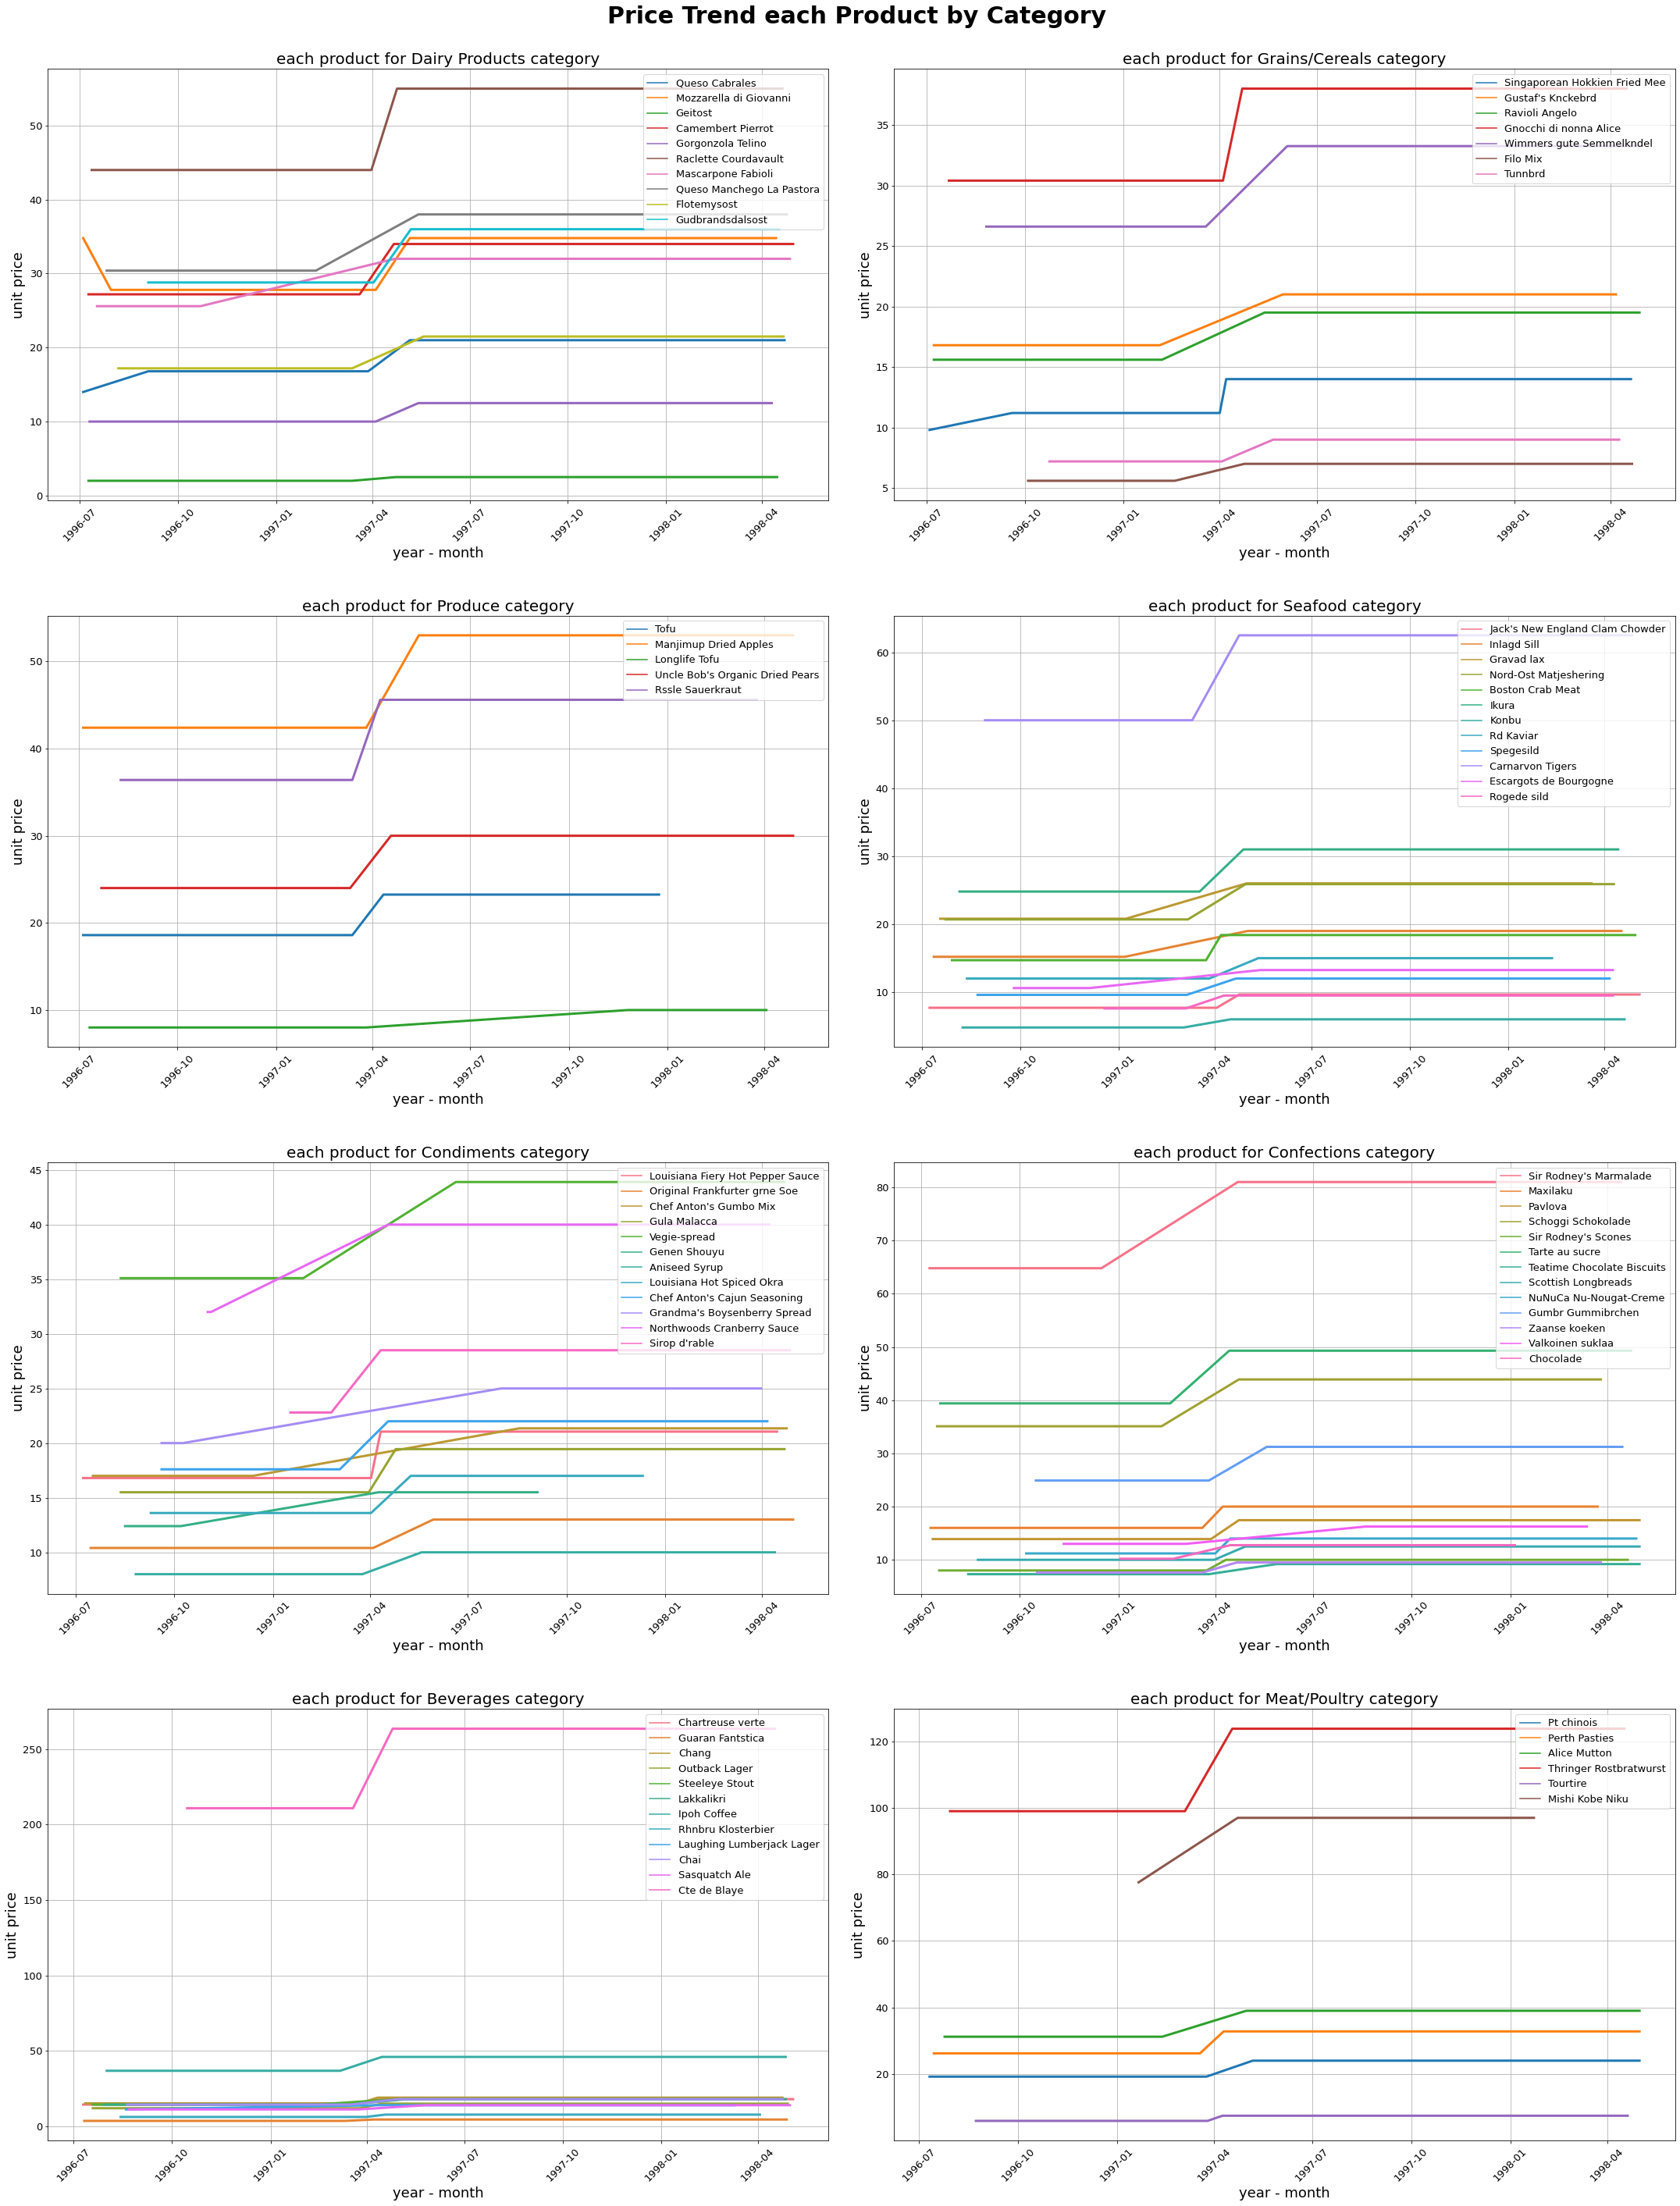

In [54]:
# Plot metrics
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 40))

# rows = i
# cols = j

# for ax identity
i, j = 0, 0

for category in product_categories:
    # Create Ax
    ax = axs[i, j]
            
    # Create the graph    
    ax = sns.lineplot(data = df2[df2["categoryname"] == category], 
                      x =  "orderdate", 
                      y = "unitprice", 
                      hue = "productname", 
                      ax = ax,
                      linewidth = 3)
    
    # graph complimentary 
    ax.set_title(f"each product for {category} category", size = 20)
    ax.set_ylabel("unit price", size = 18)
    ax.set_xlabel("year - month", size = 18)
    ax.tick_params(axis = "both", labelsize = 13)
    ax.tick_params(axis = "x", rotation = 45)
    ax.legend(loc = "upper right", fontsize = 13)
    ax.grid()
    
    
    # Incrementing the index
    # adjust the j (cols) only. if you want 2 cols then j == 2
    j += 1
    if j == 2:
        j = 0
        i += 1

fig.suptitle('Price Trend each Product by Category\n\n', fontsize = 30, weight = 'bold', x = 0.51)
plt.tight_layout(h_pad = 5, w_pad = 3)
plt.show()

**NOTES**

If you want details for one of the categories, please look at the graph above.

From all the existing graphs. I will conclude in general :
* for all product categories and each product is subject to change
* Initial price H0 (June 1996 to around Mid-Feb - March 1997)
* Price becomes H1 (Mid March April 1997)
* Most of the products experienced an increase in price during that time, there were also some products from the category that had experienced an increase before and after that time.

### EXPLORING SEAFOOD PRODUCT
Based on product price trend above, I want to focus more on seafood categories

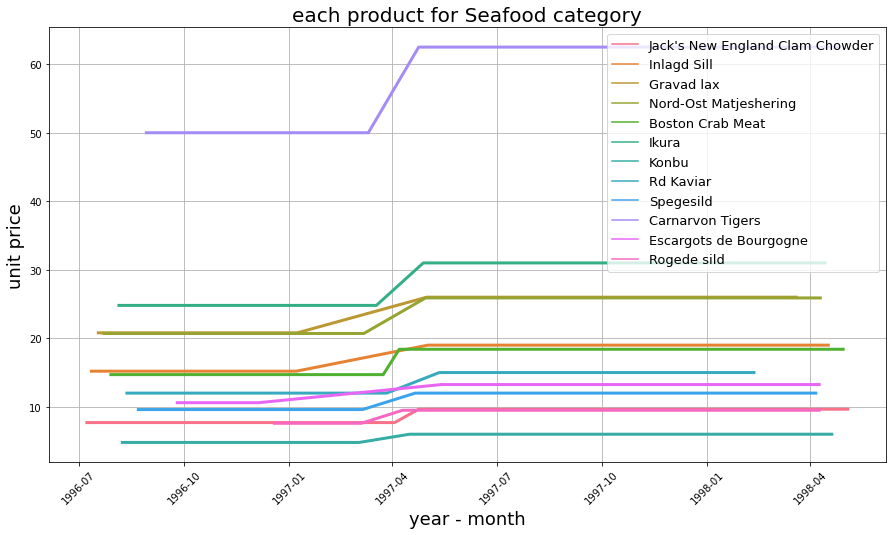

In [55]:
plt.figure(figsize = (15,8))

sns.lineplot(data = df2[df2["categoryname"] == "Seafood"],
             x =  "orderdate",
             y = "unitprice",
             hue = "productname",
             linewidth = 3)
    
# graph complimentary 
plt.title(f"each product for Seafood category", size = 20)
plt.ylabel("unit price", size = 18)
plt.xlabel("year - month", size = 18)
plt.xticks(rotation = 45)
plt.legend(loc = "upper right", fontsize = 13)
plt.grid()
plt.show()

From above graph, it can be seen that the product "Carnavon Tigers" has the highest price.

Does the highest price dominate the average sales? To perform the statistical test, the steps taken are as follows:
* Check the distribution of total sales for seafood products
* Find the mean total sales for all seafood products EXCEPT "Carnarvon Tigers"
* Hypothesis testing

We start with the statistical test of the table that will be used in the state below (before the statistical test is carried out)

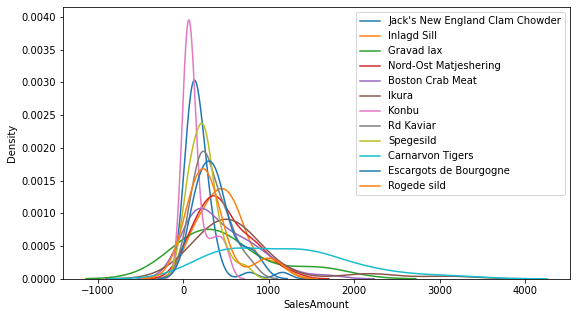

,ks_test_pval,shapiro_test_pval
Jack's New England Clam Chowder,0.000000e+00,1.733646e-09
Inlagd Sill,0.000000e+00,1.240896e-01
Gravad lax,0.000000e+00,8.125626e-02
Nord-Ost Matjeshering,0.000000e+00,1.393725e-01
Boston Crab Meat,0.000000e+00,1.514656e-03
Ikura,0.000000e+00,5.746348e-07
Konbu,3.808781e-226,1.853724e-06
Rd Kaviar,0.000000e+00,4.074949e-01
Spegesild,0.000000e+00,6.071896e-02
Carnarvon Tigers,0.000000e+00,6.703153e-02


In [56]:
# Checking normality data through graph & frequentist test
ks_p_value_comp = []
shapiro_comp = []
feature_comp = []

plt.figure(figsize = (20,5))
plt.subplot(1,2,2)

for i in df2[df2["categoryname"] == "Seafood"]["productname"].unique() :
    sns.distplot(df2[df2["productname"] == i]["SalesAmount"], hist = False, label = i)
    
    # Feature compilation
    feature_comp.append(i)
    
    # Normality test using KolmogorofSmirnov
    ks_statistic, ks_pvalue = kstest(df2[df2["productname"] == i]["SalesAmount"], "norm")
    # Save result in a list
    ks_p_value_comp.append(ks_pvalue)
    
    # Normality test using ShapiroWilk
    sw_statistic, sw_pvalue = shapiro(df2[df2["productname"] == i]["SalesAmount"])
    # Save result in a list
    shapiro_comp.append(sw_pvalue)
    
plt.legend()
plt.show()

# Make it in Dataframe
pd.DataFrame({
    "ks_test_pval" : ks_p_value_comp,
    "shapiro_test_pval" : shapiro_comp},
    index = feature_comp)

**NOTES**
* From the graph above, graph indicating that SalesAmount is right skew or positive skew.
* From the results of frequentist tests conducted with Kolmogorof Smirnov and Shapiro Wilk, the overall data has a p value < 0.05. which means we assume our data is not normally distributed.
* Based on the graph and the results of frequentist tests, our data are not normally distributed. therefore for testing will be done with non-parametric testing (median).<br><br>

We will check the hypothesis using Mann Whitney. Why do we use Mann Whitney?
* because the total_sales data we have is assumed to be not normally distributed
* There are 2 categories to compare, namely "Carnarvon Tigers" and other seafood products EXLCUDE "Carnarvon Tigers".
* Our data is numerical
* data is collected randomly<br><br>

**HYPOTHESIS**<br>
$H_0$ : average total sales of "Carnarvon Tigers" seafood products >= average total sales of other seafood products
<br>
$H_a$ : average total sales of seafood products "Carnarvon Tigers" < average total sales of other seafood products
<br>

With that hypothesis, I want to test my assumption that it is more important to diversify affordable products than to focus on one product that has a high price.

In [57]:
# pengujian hipotesa sesuai dengan hipotesis alternatif yang telah dibuat
result = list(mannwhitneyu(
            df2[(df2["categoryname"] == "Seafood") & (df2["productname"] == "Carnarvon Tigers")]["SalesAmount"],
            df2[(df2["categoryname"] == "Seafood") & ~(df2["productname"] == "Carnarvon Tigers")]["SalesAmount"],
            alternative = "less"))

print("U - Statistic", result[0])
print("P - Value", result[1])

# membandingkan p value untuk mendapatkan kesimpulan
if result[1] < 0.05 :
    print (f"\nReject H0 because P-Value ({result[1]} < 0.05)")
    print ("We have enough evidence to prove that median sales amount for 'Carnarvon Tigers' < from other product in seafood category")
else :
    print (f"\nAccept H0 because P-Value ({result[1]} > 0.05)")
    print ("NOT HAVE enough evidence to prove that median sales amount for 'Carnarvon Tigers' < from other product in seafood cateogry")
    print ("Median sales amount for 'Carnarvon Tigers' >= median sales of other product in seafood category")

U - Statistic 6892.0
P - Value 0.9999999999382863

Accept H0 because P-Value (0.9999999999382863 > 0.05)
NOT HAVE enough evidence to prove that median sales amount for 'Carnarvon Tigers' < from other product in seafood cateogry
Median sales amount for 'Carnarvon Tigers' >= median sales of other product in seafood category


**HYPOTHESIS CONCLUSION**<br>
* From the results of the non-parametric hypothesis test conducted using the MannWhitney method, that the average SalesAmount for seafood products is dominated by "Carnarvon Tigers".
* There may be cases when faced with a situation to maintain sales of 1 "Carnarvon Tigers" seafood product OR many other seafood products.
* When faced with such a case judging from the available data, it is better to maintain sales of 1 seafood product "Carnarvon Tigers" than to diversify seafood products because the median SalesAmount for the product "Carnarvon Tigers" is greater than the average sales for other seafood.
* Those can indicating that "Carnavon Tigers" product is popular and generating more revenue rather than other seafood product combined.

<a id="502"></a>
<font color="lightseagreen" size=+2.5><b>5.2. SHIPMENT ANALYSIS</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

We can make visualization based on this question : 
1. Most popular expedition service ? 
2. Days : (Please check [**here**](#5) for earlier calculation)
    * needed from customer doing the order until they received their products
    * for seller preparing the goods and hand it over to expedition service
    * for expedition service to deliver the goods to the customer<br><br>

Let's see our data first before we continue

In [58]:
df2.head()

,orderid,cust_companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,unitsinstock,unitsonorder,reorderlevel,discontinued,ExpeditionService,supplier_companyname,supplier_country,SalesAmount,cp_day1,cp_day2,cp_day3,cp_daycontrol
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,14.0,12,22,30,30,No,Federal Shipping,Cooperativa de Quesos 'Las Cabras',Spain,168.0,28,12,16,0
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,9.8,10,26,0,0,Yes,Federal Shipping,Leka Trading,Singapore,98.0,28,12,16,0
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,34.8,5,14,0,0,No,Federal Shipping,Formaggi Fortini s.r.l.,Italy,174.0,28,12,16,0
3,10249,Toms Spezialitten,Tofu,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,18.6,9,35,0,0,No,Speedy Express,Mayumi's,Japan,167.4,42,5,37,0
4,10249,Toms Spezialitten,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,42.4,40,20,0,10,No,Speedy Express,"G'day, Mate",Australia,1696.0,42,5,37,0


* Those dataframe is a combination of several tables (please check [**here**](#303))
* To get a correct number of orders, I'll use `orderid` to count number of orders happening at Northwind.
* But, I can't direcltly using df2 because `orderid` is duplicated when we join the `table orders` with `table order details` (we understand that in 1 order id can contain several products)
* here just want to emphasize that it is important to know what will be analyzed from the available data.
* Maybe if we want to analyze the product we can use df2 like we're doing in [**section 5.1**](#501), but to discuss shipment we can create new dataframe from `order` table and `shipment` table only so we don't get confused.
* But the treatment that'll be use is simply drop duplicate `orderid` and its rows

In [64]:
# copy the dataframe first so we can go back if needed
df2_topic2 = df2.copy()

# delete duplicate orderid
df2_topic2.drop_duplicates(subset = ["orderid"], inplace = True)

# We use feature that we will use for this topic only
df2_topic2 = df2_topic2[["orderid", "cp_day1", "cp_day2", "cp_day3", "ExpeditionService"]]

df2_topic2

,orderid,cp_day1,cp_day2,cp_day3,ExpeditionService
0,10248,28,12,16,Federal Shipping
3,10249,42,5,37,Speedy Express
5,10250,28,4,24,United Package
8,10251,28,7,21,Speedy Express
11,10252,28,2,26,United Package
...,...,...,...,...,...
2093,11063,28,6,22,United Package
2096,11064,28,3,25,Speedy Express
2103,11066,28,3,25,United Package
2106,11067,14,2,12,United Package


Let's export the data and make the visualization in TABLEAU

In [65]:
df2_topic2.to_excel("df2_topic2.xlsx")

<font color="lightseagreen" size=+2.5><b>MOST USED EXPEDITION SERVICE</b></font>

In [67]:
%%HTML
<div class='tableauPlaceholder' id='viz1658489176232' style='position: relative'><noscript><a href='#'><img alt='Expedition Service ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;ExpeditionService&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NorthwindTradersFinal&#47;ExpeditionService' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;No&#47;NorthwindTradersFinal&#47;ExpeditionService&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658489176232');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.height='927px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**NOTES**
* From graph above, we can see that the most used expedition services is United Package with 38% from total orders (315 orders) handled by that expedition. 

<font color="lightseagreen" size=+2.5><b>SHIPMENT DAYS ANALYSIS</b></font>

**INFORMATION FOR THE VARIABLES**
* SalesAmount   : $[unitprice * quantity]$
* cp-day1       : $[requireddate - orderdate]$ (The days it takes from the customer ordering until the goods are received)
* cp-day2       : $[shippeddate - orderdate]$ (The days it takes for the seller to prepare the order and hand it over to the expedition for delivery to the customer)
* cp-day3       : $[requireddate - shippeddate]$ (The days it takes for the expedition to deliver it to customer)
* cp-daycontrol : $[cpday1 - cpday2 - cpday3]$

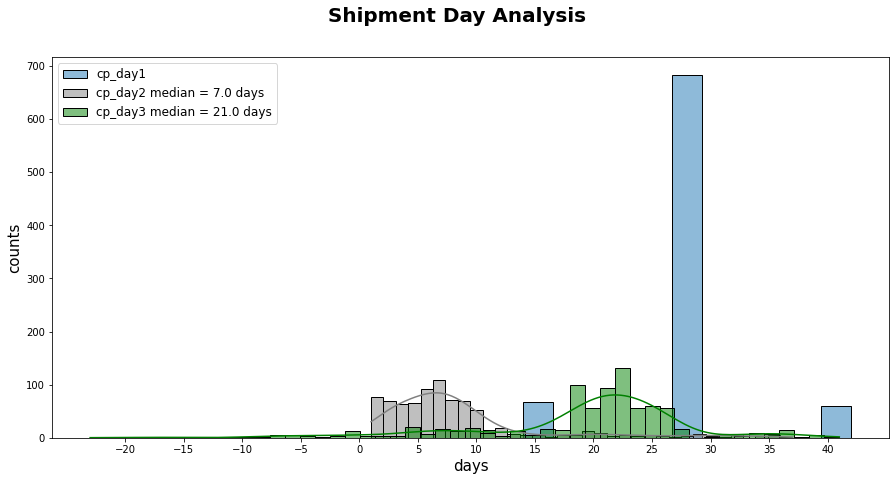

In [60]:
plt.figure(figsize = (15,7))
sns.histplot(data = df2_topic2, x = "cp_day1", alpha = 0.5, label = "cp_day1")
sns.histplot(data = df2_topic2, x = "cp_day2", color = "grey", alpha = 0.5, kde = True, fill = True, label = f"cp_day2 median = {df2_topic2['cp_day2'].median()} days")
sns.histplot(data = df2_topic2, x = "cp_day3", color = "green", alpha = 0.5, kde = True, fill = True, label = f"cp_day3 median = {df2_topic2['cp_day3'].median()} days")
plt.xticks(ticks = [-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
plt.xlabel("days", fontsize = 15)
plt.ylabel("counts", fontsize = 15)
plt.suptitle("Shipment Day Analysis", fontsize = 20, weight = "bold")
plt.legend(loc = "upper left", fontsize = 12)
plt.show()

**NOTES** 
* From above graph, we can see the distribution of days.
    * cp_day1 can explain to us that goods need around (7, 28, 42) days after customer finished their order until they received the goods.
    * cp_day2 can explain to us that the seller needs around 7 days to prep the goods and hand it over to expedition service
    * cp_day3 can explain to us that the expedition service need around 21 days to deliver the goods to customer

Now I want to see those days compared to different expedition services available

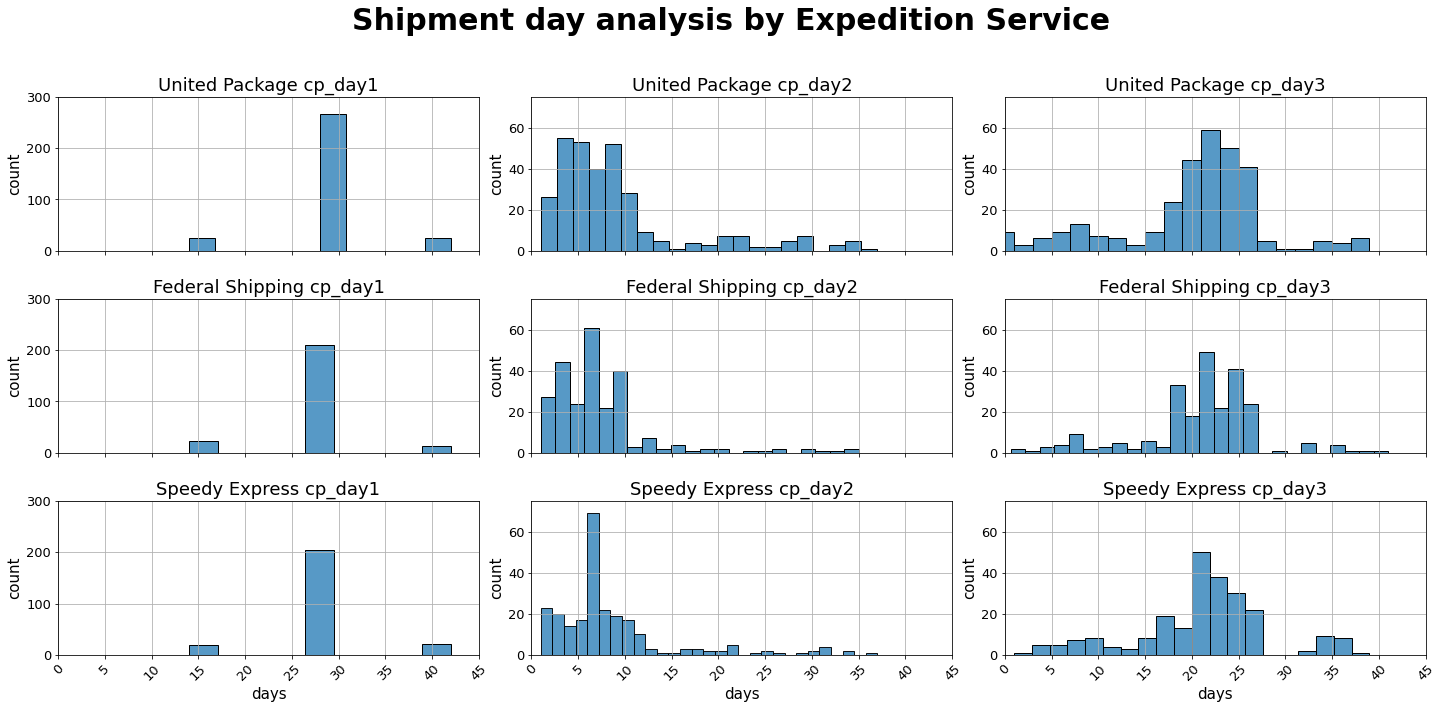

In [91]:
expedition_service_days = {
    "United Package cp_day1" : df2_topic2[df2_topic2["ExpeditionService"] == "United Package"]["cp_day1"],
    "United Package cp_day2" : df2_topic2[df2_topic2["ExpeditionService"] == "United Package"]["cp_day2"],
    "United Package cp_day3" : df2_topic2[df2_topic2["ExpeditionService"] == "United Package"]["cp_day3"],
    "Federal Shipping cp_day1" : df2_topic2[df2_topic2["ExpeditionService"] == "Federal Shipping"]["cp_day1"],
    "Federal Shipping cp_day2" : df2_topic2[df2_topic2["ExpeditionService"] == "Federal Shipping"]["cp_day2"],
    "Federal Shipping cp_day3" : df2_topic2[df2_topic2["ExpeditionService"] == "Federal Shipping"]["cp_day3"],
    "Speedy Express cp_day1" : df2_topic2[df2_topic2["ExpeditionService"] == "Speedy Express"]["cp_day1"],
    "Speedy Express cp_day2" : df2_topic2[df2_topic2["ExpeditionService"] == "Speedy Express"]["cp_day2"],
    "Speedy Express cp_day3" : df2_topic2[df2_topic2["ExpeditionService"] == "Speedy Express"]["cp_day3"],
}

# Plot metrics
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10), sharex = True)

# rows = i
# cols = j

# for ax identity
i, j = 0, 0

for title, day_data in expedition_service_days.items():
    
    # Create Ax
    ax = axs[i, j]
    
    if j == 0:
        ax.set_ylim(0, 300)
    else : 
        ax.set_ylim(0, 75)

    # Create the graph    
    ax = sns.histplot(data = day_data, ax = ax)
    
    # graph complimentary 
    ax.set_title(title, size = 18)
    ax.set_ylabel("count", size = 15)
    ax.set_xlabel("days", size = 15)
    ax.tick_params(axis = "both", labelsize = 13)
    ax.tick_params(axis = "x", rotation = 45)
    ax.set_xlim(0, 45)
    ax.grid()
    
    
    # Incrementing the index
    # adjust the j (cols) only. if you want 2 cols then j == 2
    j += 1
    if j == 3:
        j = 0
        i += 1

fig.suptitle('Shipment day analysis by Expedition Service\n', fontsize = 30, weight = 'bold', x = 0.51)
plt.tight_layout(h_pad = 2, w_pad = 1)
plt.show()

**NOTES** 
* for information that cp1 and cp2 does not reflect the performance of the expedition because. please check cp_day1, cp_day2, cp_day3 definition below 
    * cp-day1       : $[requireddate - orderdate]$ (The days it takes from the customer ordering until the goods are received)
    * cp-day2       : $[shippeddate - orderdate]$ (The days it takes for the seller to prepare the order and hand it over to the expedition for delivery to the customer)
    * cp-day3       : $[requireddate - shippeddate]$ (The days it takes for the expedition to deliver it to customer)
* We can use cp_day3 to see delivery performance of the expedition service. As we can see those 3 expedition service giving more or less same performance. 
* United Package cp_day3 has a bit higher bar because they have more orders than 2 other expedition service (please check previous explanation)

# **Thanks for Reading Until the End**